In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 15]

In [2]:
train_data = pd.read_csv('./data-storm-30/train_data.csv', parse_dates = ['DateID'], infer_datetime_format = True)

In [3]:
train_data

CategoryCode  ItemCode     DateID  DailySales
0       category_2    117610 2021-11-06           7
1       category_4    836584 2021-11-18          16
2       category_1    370195 2022-01-24           6
3       category_2    172582 2021-10-30           5
4       category_2   1006009 2021-10-30           5
...            ...       ...        ...         ...
19916   category_2    225259 2021-10-04           4
19917   category_2    111436 2021-10-12           1
19918   category_2   1098502 2021-10-01           1
19919   category_2     20824 2021-10-01           7
19920   category_1    371104 2021-10-04           4

[19921 rows x 4 columns]

In [4]:
train_data['DateID']

0       2021-11-06
1       2021-11-18
2       2022-01-24
3       2021-10-30
4       2021-10-30
           ...    
19916   2021-10-04
19917   2021-10-12
19918   2021-10-01
19919   2021-10-01
19920   2021-10-04
Name: DateID, Length: 19921, dtype: datetime64[ns]

In [5]:
grouped_data = train_data.groupby(['ItemCode'])

In [6]:
grouped_data.indices

{3418: array([  308,   380,   444,   473,   569,   811,  1146,  1180,  1238,
         1294,  1459,  1715,  1828,  2076,  2095,  2139,  2391,  2396,
         2680,  2810,  2919,  3092,  3413,  3415,  3491,  3527,  3771,
         3807,  4126,  4157,  4374,  4477,  4576,  4679,  4754,  5267,
         5406,  5415,  5598,  5927,  6028,  6051,  6300,  6378,  6625,
         6865,  6894,  7068,  7080,  7449,  7810,  8007,  8425,  8514,
         8527,  8593,  8755,  9077,  9195,  9226,  9393,  9580,  9661,
         9757,  9796,  9971, 10424, 10631, 10745, 10766, 10780, 10815,
        10930, 11029, 11141, 11161, 11219, 11225, 11298, 11684, 11722,
        11954, 12374, 12445, 12806, 12861, 12936, 13100, 13231, 13532,
        13670, 13857, 13878, 14002, 14158, 14245, 14799, 14917, 15024,
        15164, 15254, 15430, 15847, 15856, 15872, 15974, 16089, 16148,
        16455, 16557, 16629, 16780, 16875, 17013, 17039, 17199, 17384,
        17385, 17633, 17748, 18010, 18053, 18342, 18463, 18565, 18616,


In [7]:
sorted_data = {
    'category_1': {},
    'category_2': {},
    'category_3': {},
    'category_4': {}
}
sorted_data2 = {
    'category_1': {},
    'category_2': {},
    'category_3': {},
    'category_4': {}
}


for itemID, grp in grouped_data:    
    sorted_data[grp['CategoryCode'].iloc[0]][itemID] = grp.set_index('DateID').sort_values('DateID')['DailySales']
    
for key, val in sorted_data.items():
    sorted_data2[key] = pd.Series(val)
    
sorted_data3 = pd.Series(sorted_data2)

In [8]:
sorted_data

{'category_1': {3418: DateID
  2021-10-01    18
  2021-10-02     3
  2021-10-03     8
  2021-10-04     2
  2021-10-05     4
                ..
  2022-02-09    26
  2022-02-10     9
  2022-02-11     2
  2022-02-12    19
  2022-02-13     3
  Name: DailySales, Length: 129, dtype: int64,
  3427: DateID
  2021-10-01     2
  2021-10-02     7
  2021-10-03     2
  2021-10-04     3
  2021-10-05     9
                ..
  2022-02-09     2
  2022-02-10     9
  2022-02-11    10
  2022-02-12     4
  2022-02-13     1
  Name: DailySales, Length: 130, dtype: int64,
  17287: DateID
  2021-10-01    2
  2021-10-04    1
  2021-10-06    5
  2021-10-07    1
  2021-10-08    7
               ..
  2022-02-08    7
  2022-02-10    1
  2022-02-11    3
  2022-02-12    3
  2022-02-13    9
  Name: DailySales, Length: 92, dtype: int64,
  17296: DateID
  2021-10-01    28
  2021-10-02    44
  2021-10-03    43
  2021-10-04    26
  2021-10-05    27
                ..
  2022-02-09    34
  2022-02-10    74
  2022-02-11    

In [9]:
sorted_data2

{'category_1': 3418       DateID
 2021-10-01    18
 2021-10-02     3
 2021-...
 3427       DateID
 2021-10-01     2
 2021-10-02     7
 2021-...
 17287      DateID
 2021-10-01    2
 2021-10-04    1
 2021-10...
 17296      DateID
 2021-10-01    28
 2021-10-02    44
 2021-...
 24136      DateID
 2021-10-01    4
 2021-10-02    8
 2021-10...
                                  ...                        
 1085749    DateID
 2021-10-02    2
 2021-10-06    1
 2021-10...
 1090105    DateID
 2021-10-02    1
 2021-10-03    1
 2021-10...
 1090114    DateID
 2021-10-02    2
 2021-10-05    1
 2021-10...
 1090294    DateID
 2021-10-04     4
 2021-10-05     4
 2021-...
 1090303    DateID
 2021-10-01    3
 2021-10-04    2
 2021-10...
 Length: 67, dtype: object,
 'category_2': 9925       DateID
 2021-10-03     1
 2021-10-04     3
 2021-...
 20824      DateID
 2021-10-01     7
 2021-10-02    20
 2021-...
 23569      DateID
 2021-10-01    3
 2021-10-02    7
 2021-10...
 30877      DateID
 2021-10-01    11


In [10]:
sorted_data3

category_1    3418       DateID
2021-10-01    18
2021-10-02 ...
category_2    9925       DateID
2021-10-03     1
2021-10-04 ...
category_3    7666       DateID
2021-10-01    14
2021-10-02 ...
category_4    23200      DateID
2021-10-01     2
2021-10-02 ...
dtype: object

In [11]:
sorted_data3['category_1']

3418       DateID
2021-10-01    18
2021-10-02     3
2021-...
3427       DateID
2021-10-01     2
2021-10-02     7
2021-...
17287      DateID
2021-10-01    2
2021-10-04    1
2021-10...
17296      DateID
2021-10-01    28
2021-10-02    44
2021-...
24136      DateID
2021-10-01    4
2021-10-02    8
2021-10...
                                 ...                        
1085749    DateID
2021-10-02    2
2021-10-06    1
2021-10...
1090105    DateID
2021-10-02    1
2021-10-03    1
2021-10...
1090114    DateID
2021-10-02    2
2021-10-05    1
2021-10...
1090294    DateID
2021-10-04     4
2021-10-05     4
2021-...
1090303    DateID
2021-10-01    3
2021-10-04    2
2021-10...
Length: 67, dtype: object

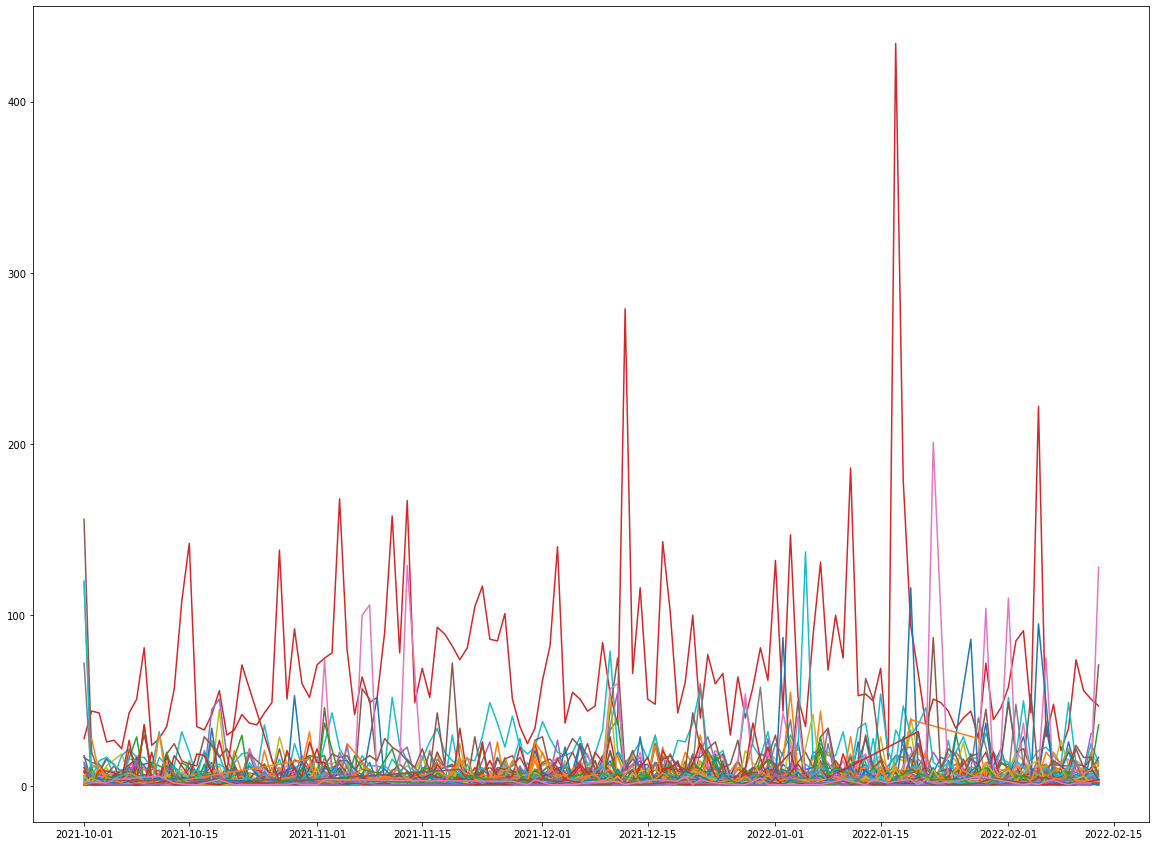

In [12]:
for i in sorted_data3['category_1']:
    plt.plot(i)
    

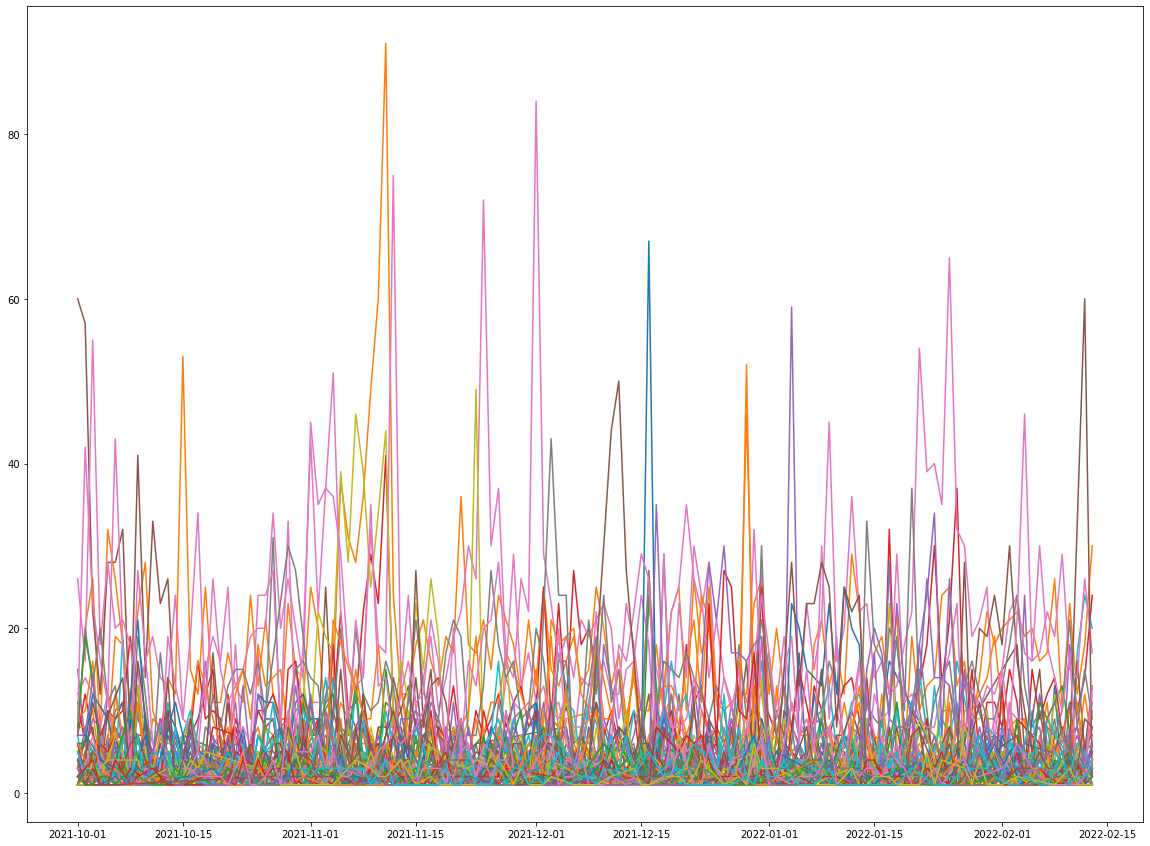

In [13]:
for i in sorted_data3['category_2']:
    plt.plot(i)

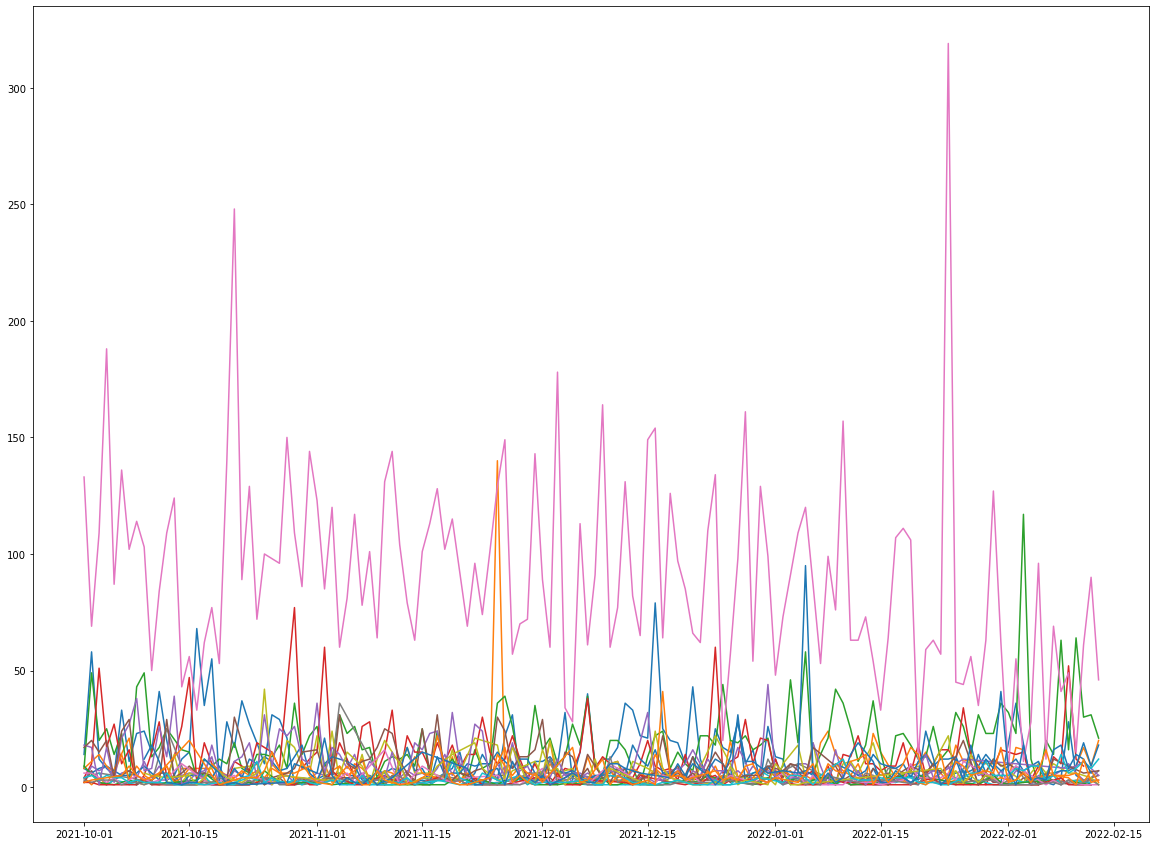

In [14]:
for i in sorted_data3['category_3']:
    plt.plot(i)

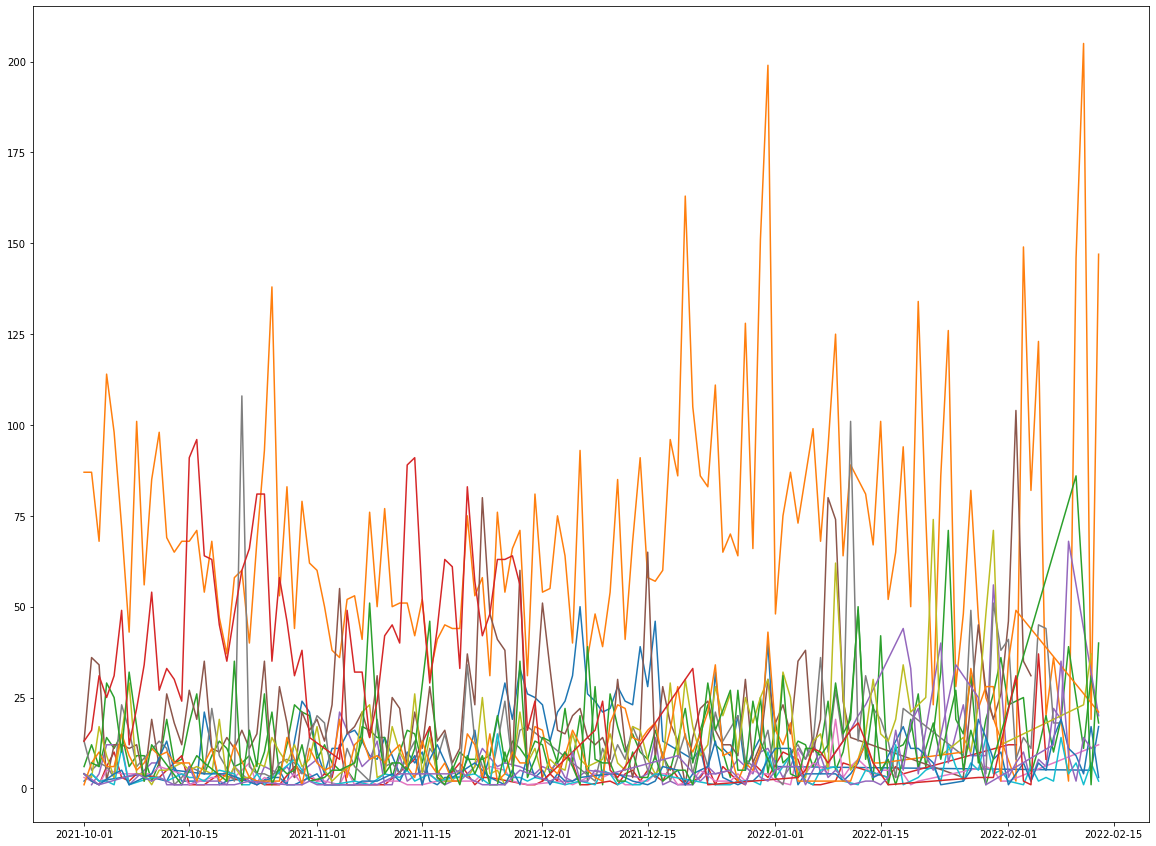

In [15]:
for i in sorted_data3['category_4']:
    plt.plot(i)

In [16]:
for cat in sorted_data3:
    for item in cat:
        print(item)

DateID
2021-10-01    18
2021-10-02     3
2021-10-03     8
2021-10-04     2
2021-10-05     4
              ..
2022-02-09    26
2022-02-10     9
2022-02-11     2
2022-02-12    19
2022-02-13     3
Name: DailySales, Length: 129, dtype: int64
DateID
2021-10-01     2
2021-10-02     7
2021-10-03     2
2021-10-04     3
2021-10-05     9
              ..
2022-02-09     2
2022-02-10     9
2022-02-11    10
2022-02-12     4
2022-02-13     1
Name: DailySales, Length: 130, dtype: int64
DateID
2021-10-01    2
2021-10-04    1
2021-10-06    5
2021-10-07    1
2021-10-08    7
             ..
2022-02-08    7
2022-02-10    1
2022-02-11    3
2022-02-12    3
2022-02-13    9
Name: DailySales, Length: 92, dtype: int64
DateID
2021-10-01    28
2021-10-02    44
2021-10-03    43
2021-10-04    26
2021-10-05    27
              ..
2022-02-09    34
2022-02-10    74
2022-02-11    56
2022-02-12    51
2022-02-13    47
Name: DailySales, Length: 136, dtype: int64
DateID
2021-10-01    4
2021-10-02    8
2021-10-03    5
2021-

In [17]:
dates = pd.date_range('2021-10-01', '2022-02-13', freq='D')
dates

DatetimeIndex(['2021-10-01', '2021-10-02', '2021-10-03', '2021-10-04',
               '2021-10-05', '2021-10-06', '2021-10-07', '2021-10-08',
               '2021-10-09', '2021-10-10',
               ...
               '2022-02-04', '2022-02-05', '2022-02-06', '2022-02-07',
               '2022-02-08', '2022-02-09', '2022-02-10', '2022-02-11',
               '2022-02-12', '2022-02-13'],
              dtype='datetime64[ns]', length=136, freq='D')

In [18]:
sorted_data3['category_1'][3418]

DateID
2021-10-01    18
2021-10-02     3
2021-10-03     8
2021-10-04     2
2021-10-05     4
              ..
2022-02-09    26
2022-02-10     9
2022-02-11     2
2022-02-12    19
2022-02-13     3
Name: DailySales, Length: 129, dtype: int64

In [19]:
template = pd.Series([0 for _ in range(len(dates))], index=dates)

In [20]:
template

2021-10-01    0
2021-10-02    0
2021-10-03    0
2021-10-04    0
2021-10-05    0
             ..
2022-02-09    0
2022-02-10    0
2022-02-11    0
2022-02-12    0
2022-02-13    0
Freq: D, Length: 136, dtype: int64

In [21]:
fff = template.add(sorted_data3['category_1'][3418], fill_value=0)

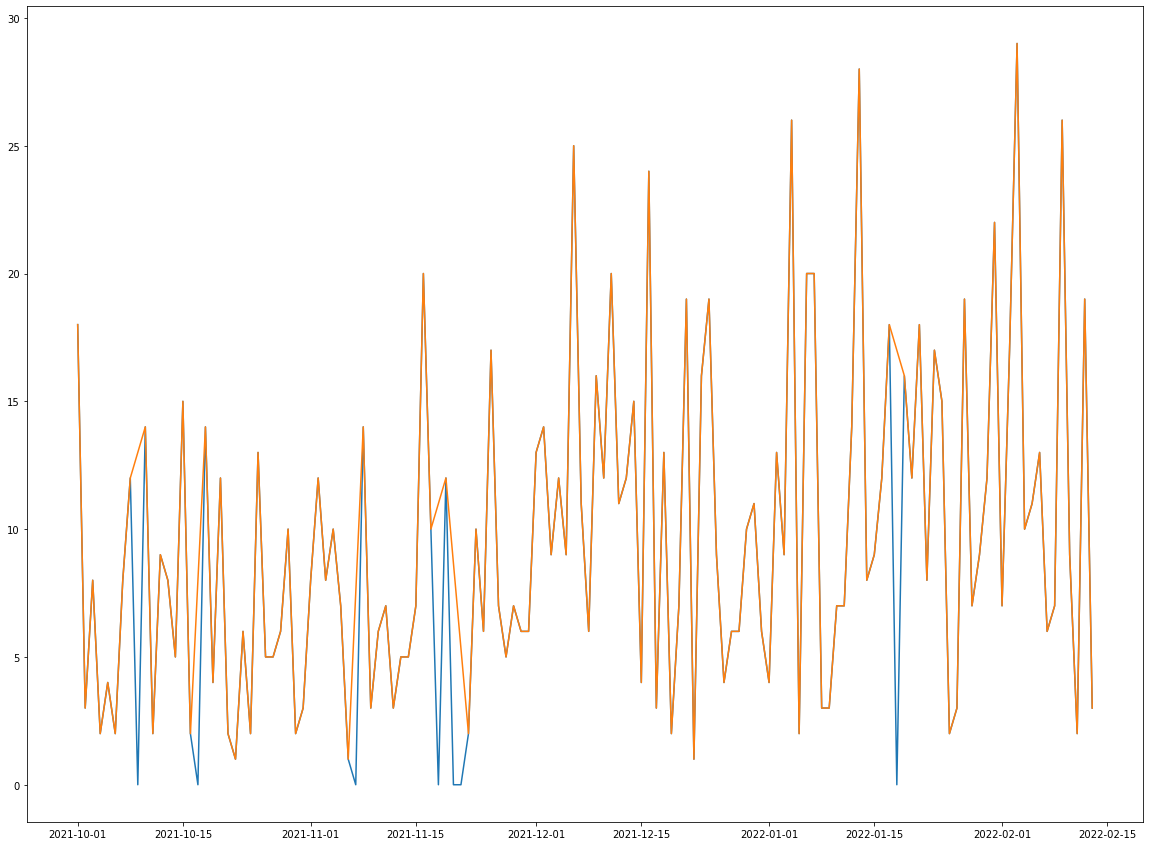

In [22]:
plt.plot(fff)
plt.plot(sorted_data3['category_1'][3418])

In [23]:
template

2021-10-01    0
2021-10-02    0
2021-10-03    0
2021-10-04    0
2021-10-05    0
             ..
2022-02-09    0
2022-02-10    0
2022-02-11    0
2022-02-12    0
2022-02-13    0
Freq: D, Length: 136, dtype: int64

In [24]:
sorted_data4 = sorted_data3.copy()

for cat in sorted_data3.keys():
    print(cat)
    for item in sorted_data3[cat].keys():
        sorted_data4[cat][item] = template.add(sorted_data3[cat][item], fill_value=0).copy()

category_1
category_2
category_3
category_4


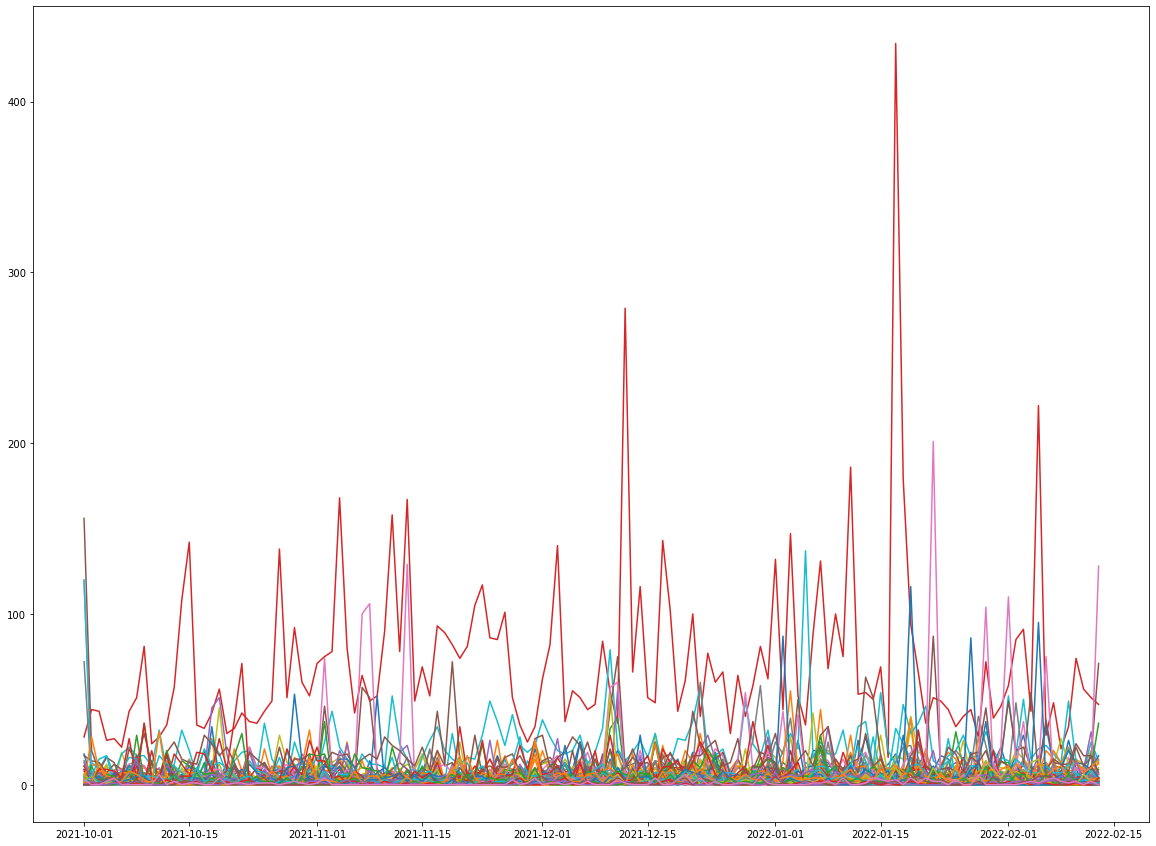

In [25]:
for i in sorted_data4['category_1']:
    plt.plot(i)

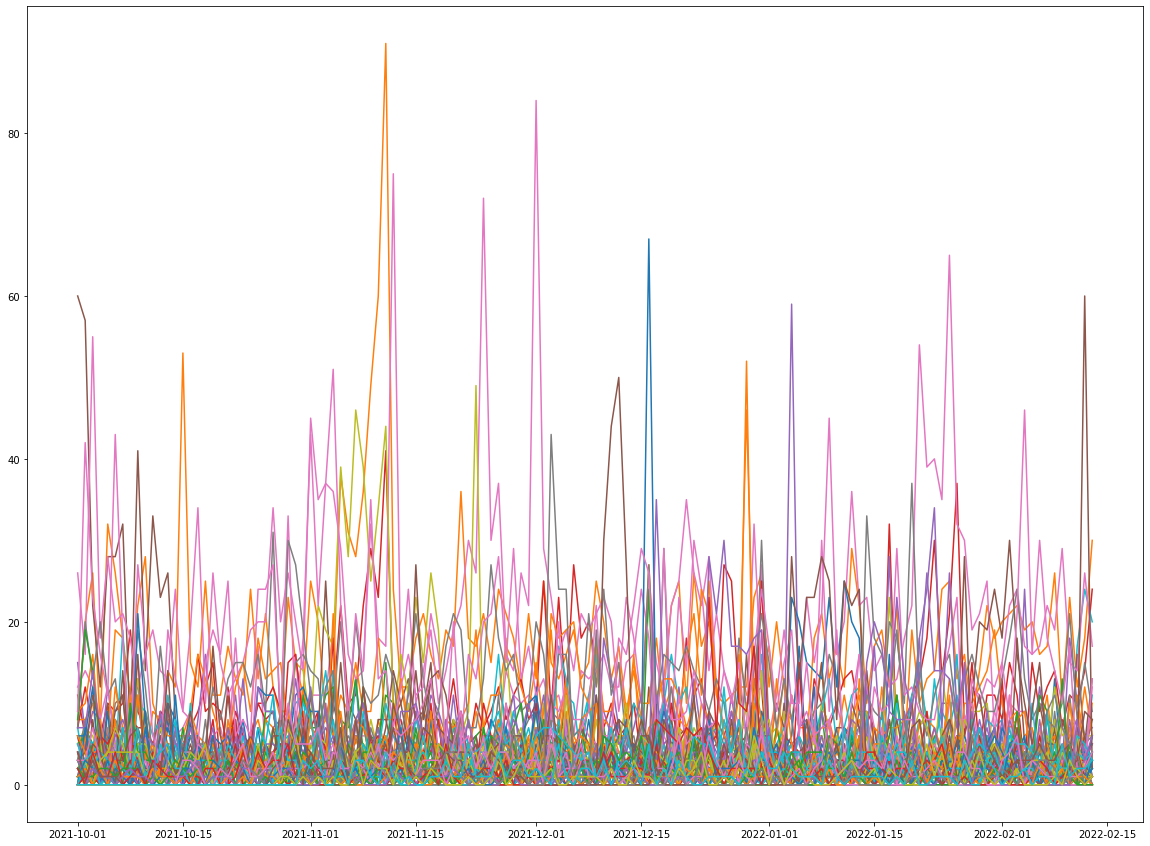

In [26]:
for i in sorted_data4['category_2']:
    plt.plot(i)

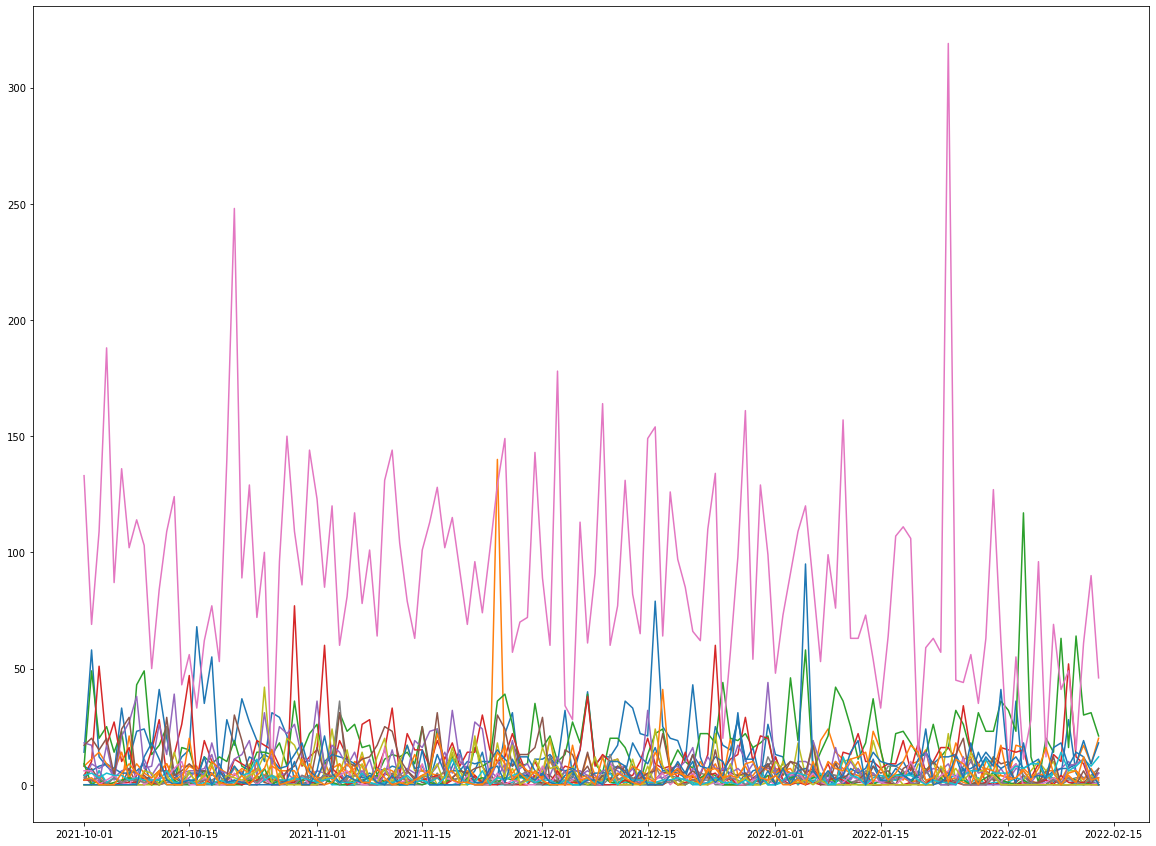

In [27]:
for i in sorted_data4['category_3']:
    plt.plot(i)

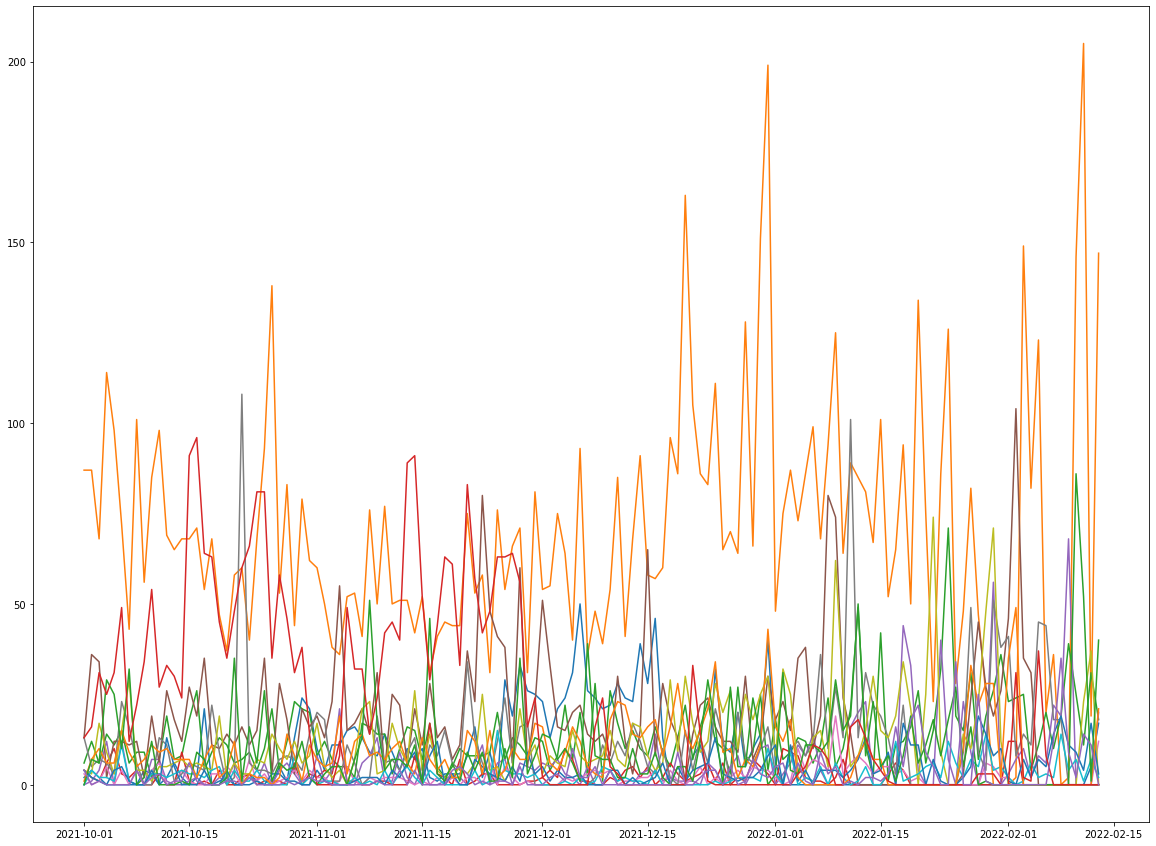

In [28]:
for i in sorted_data4['category_4']:
    plt.plot(i)

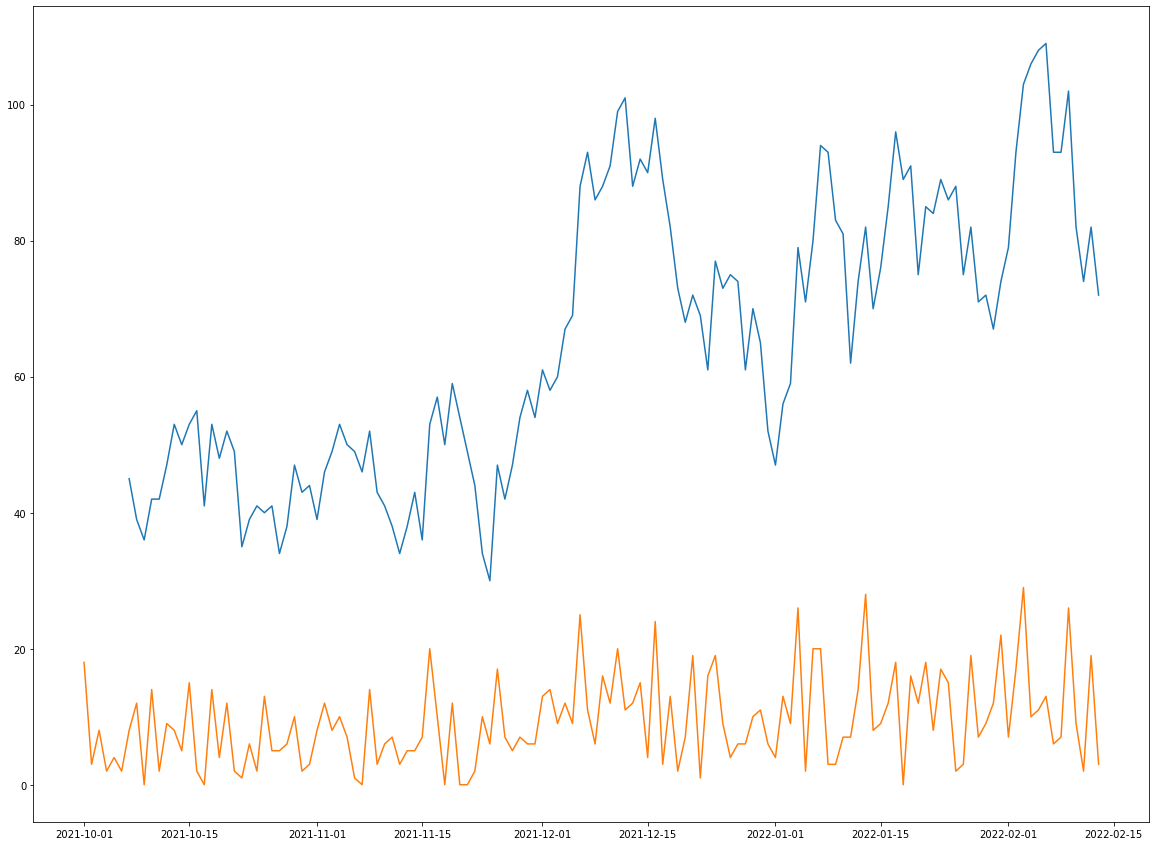

In [29]:
plt.plot(sorted_data4['category_1'][3418].rolling(7).sum())
plt.plot(sorted_data4['category_1'][3418])

In [30]:
from sklearn.linear_model import HuberRegressor

In [31]:
x = np.array(range(130)).reshape(-1, 1)
y = np.array(sorted_data4['category_1'][3418].rolling(7).sum().values.copy()[6:]).reshape(-1, 1)

In [32]:
y

array([[ 45.],
       [ 39.],
       [ 36.],
       [ 42.],
       [ 42.],
       [ 47.],
       [ 53.],
       [ 50.],
       [ 53.],
       [ 55.],
       [ 41.],
       [ 53.],
       [ 48.],
       [ 52.],
       [ 49.],
       [ 35.],
       [ 39.],
       [ 41.],
       [ 40.],
       [ 41.],
       [ 34.],
       [ 38.],
       [ 47.],
       [ 43.],
       [ 44.],
       [ 39.],
       [ 46.],
       [ 49.],
       [ 53.],
       [ 50.],
       [ 49.],
       [ 46.],
       [ 52.],
       [ 43.],
       [ 41.],
       [ 38.],
       [ 34.],
       [ 38.],
       [ 43.],
       [ 36.],
       [ 53.],
       [ 57.],
       [ 50.],
       [ 59.],
       [ 54.],
       [ 49.],
       [ 44.],
       [ 34.],
       [ 30.],
       [ 47.],
       [ 42.],
       [ 47.],
       [ 54.],
       [ 58.],
       [ 54.],
       [ 61.],
       [ 58.],
       [ 60.],
       [ 67.],
       [ 69.],
       [ 88.],
       [ 93.],
       [ 86.],
       [ 88.],
       [ 91.],
       [ 99.],
       [10

In [33]:
linear_regressor = HuberRegressor()
linear_regressor.fit(x, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


HuberRegressor()

In [34]:
linear_regressor.predict(x)

array([37.12062151, 37.54359496, 37.96656842, 38.38954187, 38.81251532,
       39.23548877, 39.65846222, 40.08143568, 40.50440913, 40.92738258,
       41.35035603, 41.77332948, 42.19630294, 42.61927639, 43.04224984,
       43.46522329, 43.88819674, 44.3111702 , 44.73414365, 45.1571171 ,
       45.58009055, 46.003064  , 46.42603746, 46.84901091, 47.27198436,
       47.69495781, 48.11793126, 48.54090472, 48.96387817, 49.38685162,
       49.80982507, 50.23279852, 50.65577198, 51.07874543, 51.50171888,
       51.92469233, 52.34766578, 52.77063924, 53.19361269, 53.61658614,
       54.03955959, 54.46253304, 54.8855065 , 55.30847995, 55.7314534 ,
       56.15442685, 56.5774003 , 57.00037376, 57.42334721, 57.84632066,
       58.26929411, 58.69226756, 59.11524102, 59.53821447, 59.96118792,
       60.38416137, 60.80713482, 61.23010828, 61.65308173, 62.07605518,
       62.49902863, 62.92200208, 63.34497554, 63.76794899, 64.19092244,
       64.61389589, 65.03686934, 65.4598428 , 65.88281625, 66.30

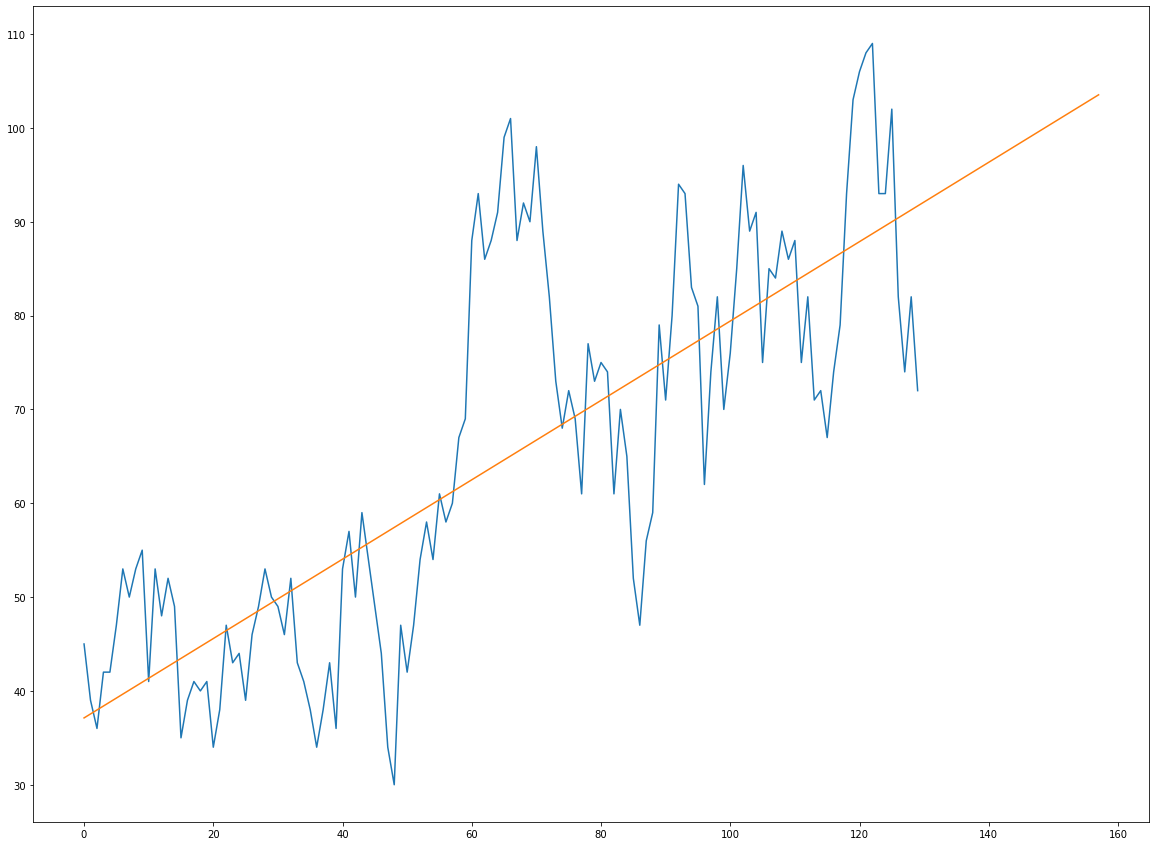

In [35]:
plt.plot(x, y)
plt.plot(np.array(range(158)).reshape(-1, 1), linear_regressor.predict(np.array(range(158)).reshape(-1, 1)))

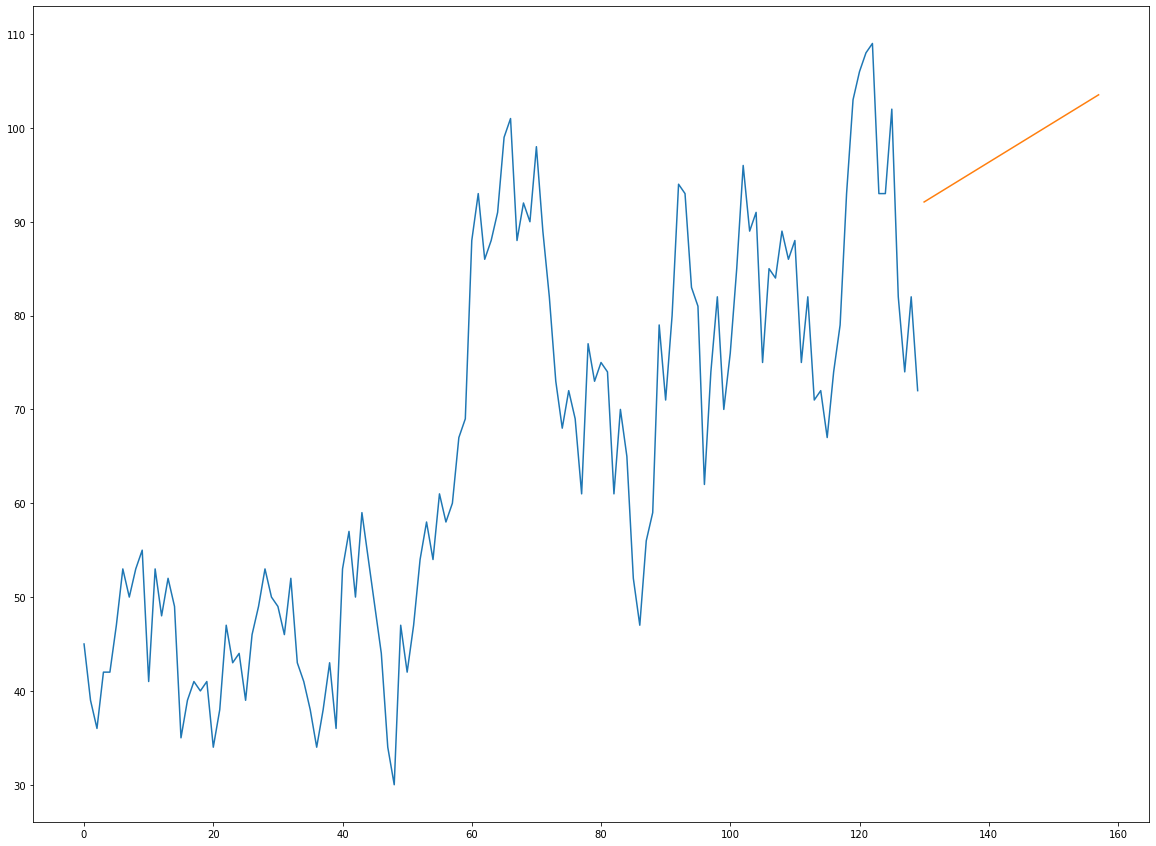

In [36]:
plt.plot(x, y)
plt.plot(np.array(range(130, 130 + 28)).reshape(-1, 1), linear_regressor.predict(np.array(range(130, 130 + 28)).reshape(-1, 1)))

In [37]:
linear_regressor.predict(np.array(range(130, 130 + 28)).reshape(-1, 1))

array([ 92.10717027,  92.53014372,  92.95311718,  93.37609063,
        93.79906408,  94.22203753,  94.64501098,  95.06798444,
        95.49095789,  95.91393134,  96.33690479,  96.75987824,
        97.1828517 ,  97.60582515,  98.0287986 ,  98.45177205,
        98.8747455 ,  99.29771896,  99.72069241, 100.14366586,
       100.56663931, 100.98961276, 101.41258622, 101.83555967,
       102.25853312, 102.68150657, 103.10448002, 103.52745348])

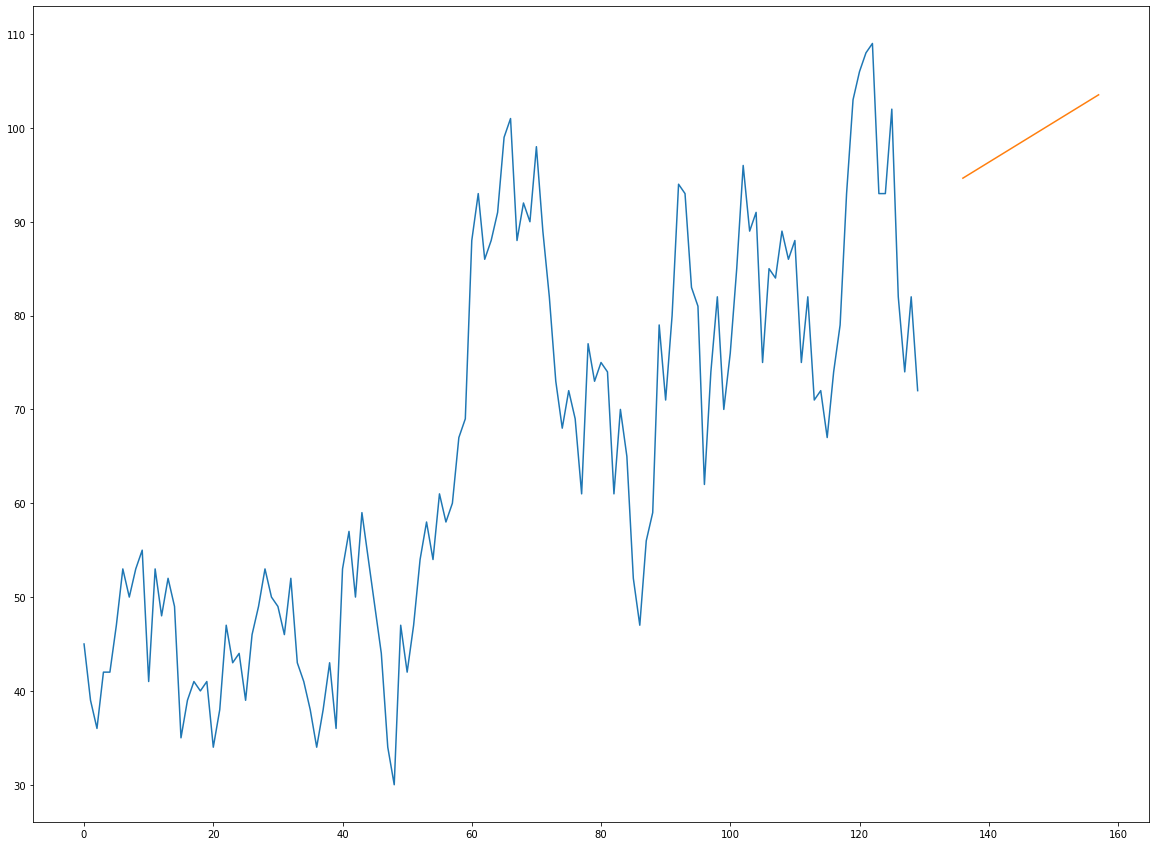

In [38]:
plt.plot(x, y)
plt.plot(np.array(range(136, 136 + 28, 7)).reshape(-1, 1), linear_regressor.predict(np.array(range(136, 136 + 28, 7)).reshape(-1, 1)))

In [39]:
linear_regressor.predict(np.array(range(136, 136 + 28, 7)).reshape(-1, 1))

array([ 94.64501098,  97.60582515, 100.56663931, 103.52745348])

In [40]:
x = np.array(range(130)).reshape(-1, 1)
predictions = {}

for cat_id in sorted_data4.keys():
    for item_code in sorted_data4[cat_id].keys():
        item = sorted_data4[cat_id][item_code]
        y = np.array(item.rolling(7).sum().values.copy()[6:]).reshape(-1, 1)
        linear_regressor = HuberRegressor()
        linear_regressor.fit(x, y)
        for w, s in enumerate(linear_regressor.predict(np.array(range(136, 136 + 28, 7)).reshape(-1, 1))):
            predictions[f"{cat_id}_{item_code}_w{w+1}"] = max(round(float(s)), 0)
predictions

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

{'category_1_3418_w1': 95,
 'category_1_3418_w2': 98,
 'category_1_3418_w3': 101,
 'category_1_3418_w4': 104,
 'category_1_3427_w1': 46,
 'category_1_3427_w2': 46,
 'category_1_3427_w3': 46,
 'category_1_3427_w4': 46,
 'category_1_17287_w1': 27,
 'category_1_17287_w2': 28,
 'category_1_17287_w3': 29,
 'category_1_17287_w4': 30,
 'category_1_17296_w1': 563,
 'category_1_17296_w2': 569,
 'category_1_17296_w3': 575,
 'category_1_17296_w4': 581,
 'category_1_24136_w1': 23,
 'category_1_24136_w2': 22,
 'category_1_24136_w3': 22,
 'category_1_24136_w4': 22,
 'category_1_35449_w1': 22,
 'category_1_35449_w2': 23,
 'category_1_35449_w3': 24,
 'category_1_35449_w4': 25,
 'category_1_35530_w1': 12,
 'category_1_35530_w2': 12,
 'category_1_35530_w3': 12,
 'category_1_35530_w4': 12,
 'category_1_35584_w1': 8,
 'category_1_35584_w2': 8,
 'category_1_35584_w3': 8,
 'category_1_35584_w4': 8,
 'category_1_36898_w1': 83,
 'category_1_36898_w2': 84,
 'category_1_36898_w3': 85,
 'category_1_36898_w4': 86

In [41]:
out_df = pd.DataFrame(pd.Series(predictions), columns=["WeeklySales"])
out_df.index.name = "ID"
out_df

WeeklySales
ID                                
category_1_3418_w1              95
category_1_3418_w2              98
category_1_3418_w3             101
category_1_3418_w4             104
category_1_3427_w1              46
...                            ...
category_4_1074823_w4            0
category_4_1082743_w1           34
category_4_1082743_w2           36
category_4_1082743_w3           38
category_4_1082743_w4           40

[776 rows x 1 columns]

In [42]:
out_df.to_csv('out.csv', index=True)

In [43]:
test_data = pd.read_csv('./data-storm-30/test_data.csv')
test_data["ID"] =  test_data['CategoryCode'] + "_" + test_data['ItemCode'].map(str) + "_" + test_data['Week']
test_data.drop('CategoryCode',axis='columns', inplace=True)
test_data.drop('ItemCode',axis='columns', inplace=True)
test_data.drop('Week',axis='columns', inplace=True)
test_data.drop('PredictedSales',axis='columns', inplace=True)
test_data.set_index("ID", inplace=True)
test_data["WeeklySales"] = [out_df["WeeklySales"][p] for p in test_data.index]
test_data

WeeklySales
ID                                
category_1_43738_w4             30
category_2_1006090_w1           29
category_2_1076929_w4            6
category_1_1081321_w3            3
category_2_216151_w4            17
...                            ...
category_2_1101571_w1            9
category_2_1090258_w4           25
category_2_906595_w1            12
category_2_32245_w1             50
category_2_1006090_w2           30

[377 rows x 1 columns]

In [44]:
test_data.to_csv('submission.csv', index=True)